# EDA

Для начала нужно выгрузить данные с SQL-сервера. Для этого я написал функцию, которая принимает на вход название таблицы и возвращает ее в виде pandas.DataFrame.

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
engine = create_engine(
    "postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
    "postgres.lab.karpov.courses:6432/startml"
)


##### Таблица user\_data

Cодержит информацию о всех пользователях соц.сети

<table class="table table-bordered"><tbody><tr><td>Field name</td><td>Overview</td></tr><tr><td><span style="font-weight:600" data-token-index="0" class="notion-enable-hover" data-reactroot="">age</span></td><td>Возраст пользователя (в профиле)</td></tr><tr><td><span style="font-weight:600" data-token-index="0" class="notion-enable-hover" data-reactroot="">city</span></td><td>Город пользователя (в профиле)</td></tr><tr><td><span style="font-weight:600" data-token-index="0" class="notion-enable-hover" data-reactroot="">country</span></td><td>Страна пользователя (в профиле)</td></tr><tr><td><span style="font-weight:600" data-token-index="0" class="notion-enable-hover" data-reactroot="">exp_group</span></td><td>Экспериментальная группа: некоторая зашифрованная категория</td></tr><tr><td><span style="font-weight:600" data-token-index="0" class="notion-enable-hover" data-reactroot="">gender</span></td><td>Пол пользователя</td></tr><tr><td><span style="font-weight:600" data-token-index="0" class="notion-enable-hover" data-reactroot="">id</span></td><td>Уникальный идентификатор пользователя</td></tr><tr><td><span style="font-weight:600" data-token-index="0" class="notion-enable-hover" data-reactroot="">os</span></td><td>Операционная система устройства, с которого происходит пользование соц.сетью</td></tr><tr><td><b>source</b></td><td>Пришел ли пользователь в приложение с органического трафика или с рекламы</td></tr></tbody></table>

##### Таблица post\_text\_df

Содержит информацию о постах и уникальный ID каждой единицы с соответствующим ей текстом и топиком

<table class="table table-bordered"><tbody><tr><td><b>Field name</b></td><td><b>Overview</b></td></tr><tr><td><span style="font-weight:600" data-token-index="0" class="notion-enable-hover" data-reactroot="">id</span></td><td>Уникальный идентификатор поста</td></tr><tr><td><span style="font-weight:600" data-token-index="0" class="notion-enable-hover" data-reactroot="">text</span></td><td>Текстовое содержание поста</td></tr><tr><td><span style="font-weight:600" data-token-index="0" class="notion-enable-hover" data-reactroot="">topic</span></td><td>Основная тематика</td></tr></tbody></table>

##### Таблица feed\_data

Содержит историю о просмотренных постах для каждого юзера в изучаемый период.

**Внимание: Таблица ООООЧЕНЬ большая. Рекомендуется не загружать ее полностью, иначе все упадет**

<table class="table table-bordered"><tbody><tr><td><b>Field name</b></td><td><b>Overview</b></td></tr><tr><td><span style="font-weight:600" data-token-index="0" class="notion-enable-hover" data-reactroot="">timestamp</span></td><td>Время, когда был произведен просмотр</td></tr><tr><td><span style="font-weight:600" data-token-index="0" class="notion-enable-hover" data-reactroot="">user_id</span></td><td>id пользователя, который совершил просмотр</td></tr><tr><td><span style="font-weight:600" data-token-index="0" class="notion-enable-hover" data-reactroot="">post_id</span></td><td>id просмотренного поста</td></tr><tr><td><span style="font-weight:600" data-token-index="0" class="notion-enable-hover" data-reactroot="">action</span></td><td>Тип действия: просмотр или лайк</td></tr><tr><td><span style="font-weight:600" data-token-index="0" class="notion-enable-hover" data-reactroot="">target</span></td><td>1 у просмотров, если почти сразу после просмотра был совершен лайк, иначе 0. У действий like пропущенное значение.</td></tr></tbody></table>

            +------------+     +---------------+     +-----------+
            | user_data  |     | post_text_df  |     | feed_data |
            +------------+     +---------------+     +-----------+
            | age        |     | id            |     | timestamp |
            | city       |     | text          |     | user_id   |
            | country    |     | topic         |     | post_id   |
            | exp_group  |     +---------------+     | action    |
            | gender     |           7,023           | target    |
            | id         |                           +-----------+
            | os         |                             76,892,800
            | source     |
            +------------+
                163,205 

In [13]:
# Чтение данных таблицы user_data
query = "SELECT * FROM user_data"
user_data = pd.read_sql(query, engine)

# Чтение данных таблицы post_text_df
query = "SELECT * FROM post_text_df"
post_text_df = pd.read_sql(query, engine)

# Чтение ограниченного количества данных таблицы feed_data
query = "SELECT * FROM feed_data LIMIT 10000"
feed_data = pd.read_sql(query, engine)

Index(['user_id', 'gender', 'age', 'country', 'city', 'exp_group', 'os',
       'source'],
      dtype='object')


In [10]:
query = "SELECT COUNT(*) FROM feed_data"
result = pd.read_sql(query, engine)
record_count = result.iloc[0, 0]

print(f"Количество записей в таблице feed_data: {record_count}")


Количество записей в таблице feed_data: 76892800


## user_data 

In [4]:
# Информация о наборе данных
print(user_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163205 entries, 0 to 163204
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    163205 non-null  int64 
 1   gender     163205 non-null  int64 
 2   age        163205 non-null  int64 
 3   country    163205 non-null  object
 4   city       163205 non-null  object
 5   exp_group  163205 non-null  int64 
 6   os         163205 non-null  object
 7   source     163205 non-null  object
dtypes: int64(4), object(4)
memory usage: 10.0+ MB
None


In [30]:
user_data.head()

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads


In [31]:
# Проверяем наличие пропусков
user_data.isnull().sum()

user_id      0
gender       0
age          0
country      0
city         0
exp_group    0
os           0
source       0
dtype: int64

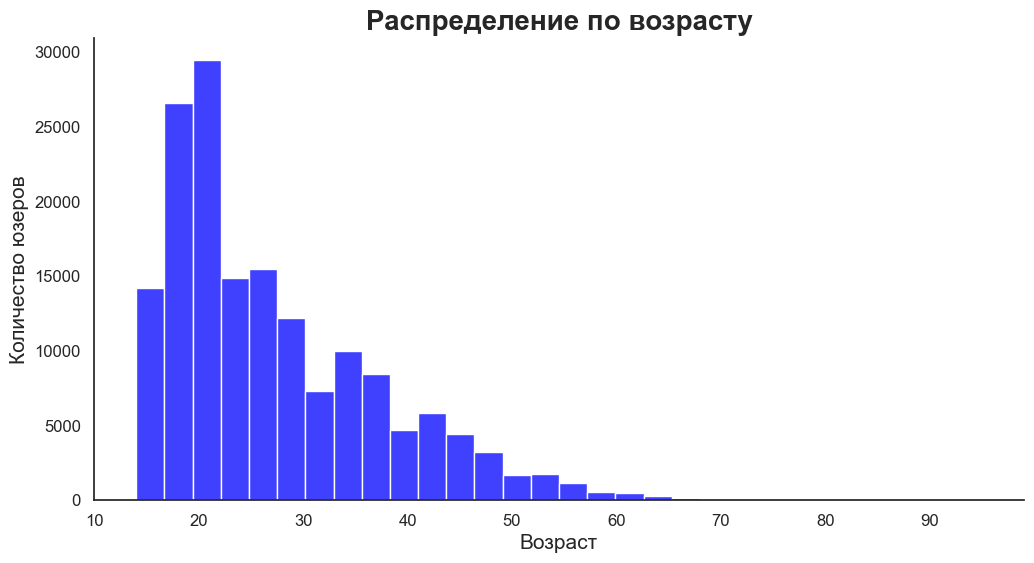

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Установите стиль графика
sns.set(style="white")

# Создайте гистограмму
plt.figure(figsize=(12, 6))
ax = sns.histplot(user_data['age'], kde=False, bins=30, color='blue')

# Настройка внешнего вида графика
ax.set_title("Распределение по возрасту", fontsize=20, fontweight='bold')
ax.set_xlabel("Возраст", fontsize=15)
ax.set_ylabel("Количество юзеров", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Удаление рамки
sns.despine()

# Отобразите график
plt.show()


In [6]:
query = """
SELECT gender, COUNT(*) as count
FROM user_data
WHERE gender IN (0, 1)
GROUP BY gender
"""

gender_counts = pd.read_sql(query, con=engine)
print(gender_counts)


   gender  count
0       0  73225
1       1  89980


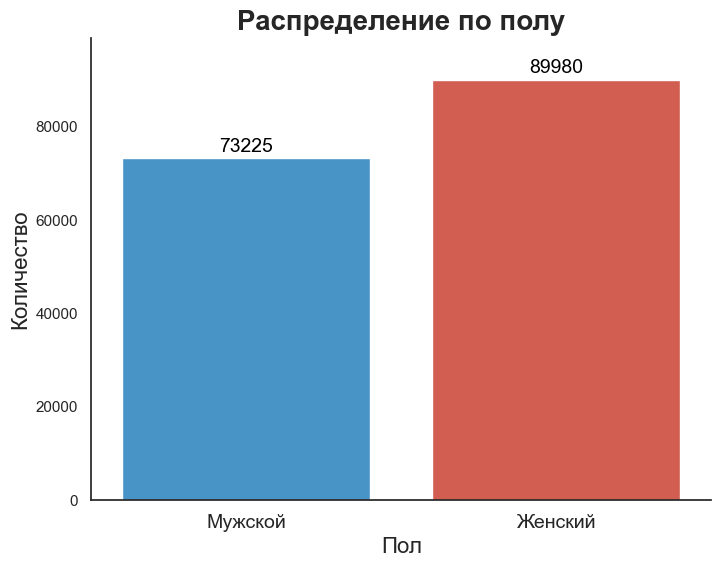

In [7]:
# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='gender', y='count', data=gender_counts, palette=['#3498db', '#e74c3c'])

# Настройка внешнего вида графика
ax.set_title("Распределение по полу", fontsize=20, fontweight='bold')
ax.set_xlabel("Пол", fontsize=16)
ax.set_ylabel("Количество", fontsize=16)
ax.set_xticklabels(["Мужской", "Женский"], fontsize=14)
ax.set_ylim(0, gender_counts['count'].max() * 1.1)

# Добавление значений над столбцами
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')

# Удаление рамки
sns.despine()

# Отображение графика
plt.show()

In [27]:
# Информация о наборе данных
print(user_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163205 entries, 0 to 163204
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    163205 non-null  int64 
 1   gender     163205 non-null  int64 
 2   age        163205 non-null  int64 
 3   country    163205 non-null  object
 4   city       163205 non-null  object
 5   exp_group  163205 non-null  int64 
 6   os         163205 non-null  object
 7   source     163205 non-null  object
dtypes: int64(4), object(4)
memory usage: 10.0+ MB
None


In [ ]:
# Подсчитываем количество пользователей для каждой страны и города
country_city_counts = user_data.groupby(['country', 'city']).size().reset_index(name='count')

fig = px.treemap(country_city_counts, path=['country', 'city'], values='count', title='Number of Users per Country and City')

# Настройка внешнего вида графика
fig.update_layout(
    title={
        'text': "Number of Users per Country and City",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(size=14)
)

fig.show()



Возраст и пол пользователей:

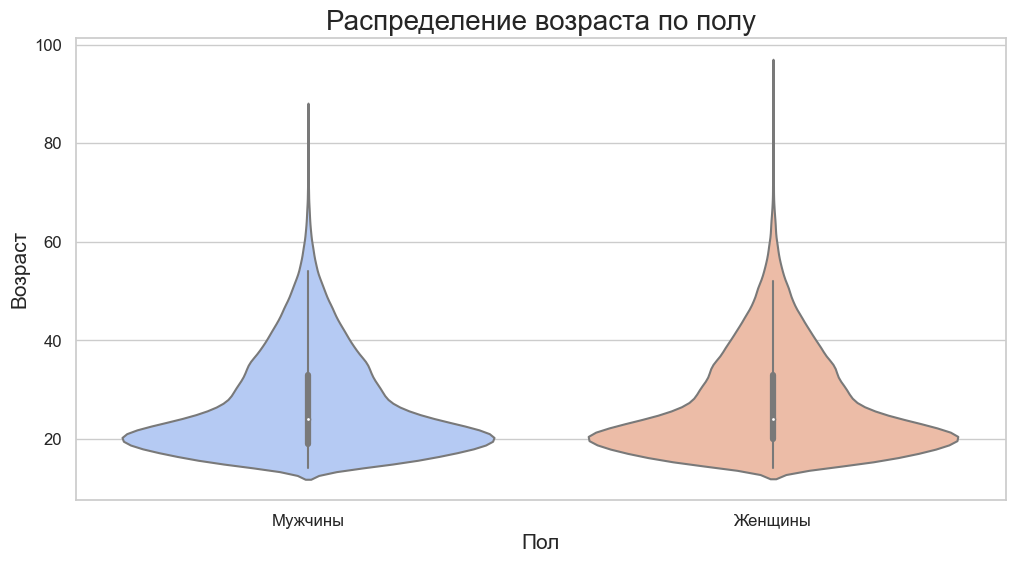

In [28]:
# Установите стиль графика
sns.set(style="whitegrid")

# Создайте violinplot
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='gender', y='age', data=user_data, palette='coolwarm', split=True)

# Настройка внешнего вида графика
ax.set_title("Распределение возраста по полу", fontsize=20)
ax.set_xlabel("Пол", fontsize=15)
ax.set_ylabel("Возраст", fontsize=15)
ax.set_xticklabels(["Мужчины", "Женщины"], fontsize=12)
plt.yticks(fontsize=12)

# Отобразите график
plt.show()


Распределение возраста пользователей по экспериментальным группам:

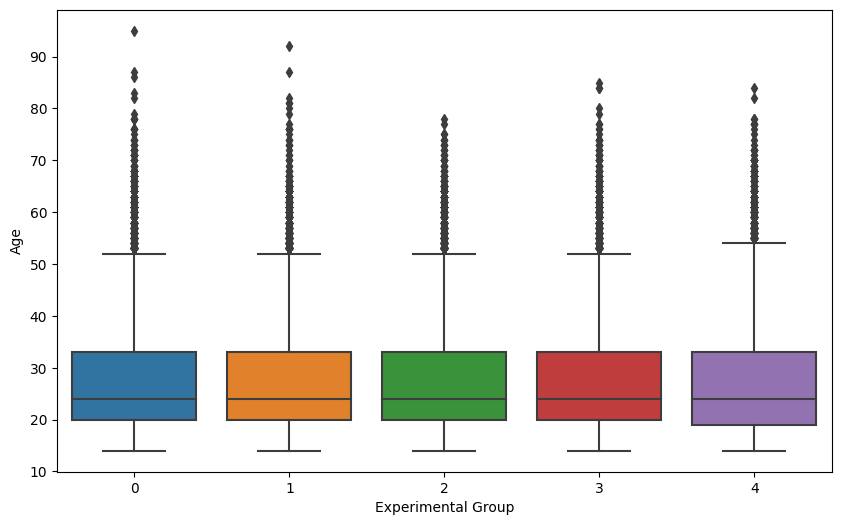

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='exp_group', y='age', data=user_data)
plt.xlabel('Experimental Group')
plt.ylabel('Age')
plt.show()


Распределение операционных систем по полу:

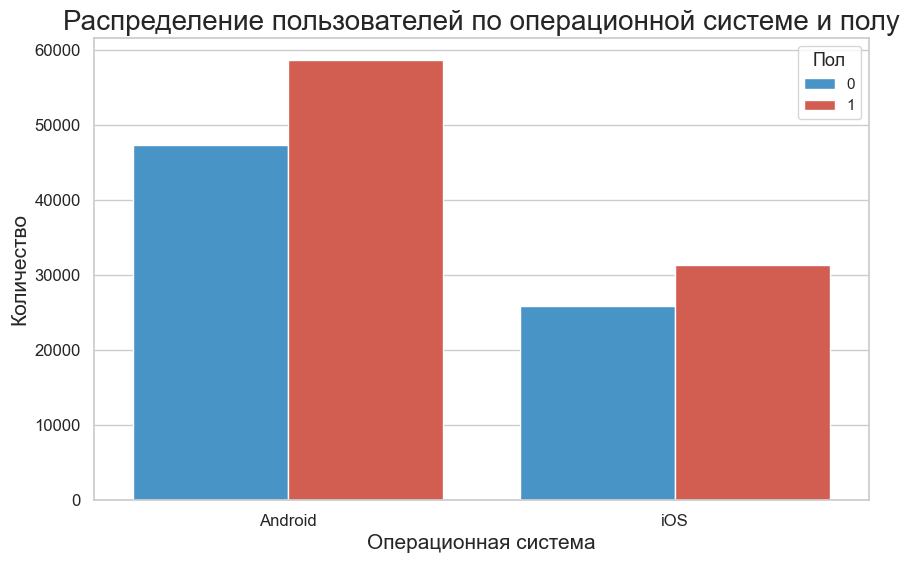

In [16]:
# Установите стиль графика
sns.set(style="whitegrid")

# Создайте countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='os', hue='gender', data=user_data, palette=['#3498db', '#e74c3c'])

# Настройка внешнего вида графика
ax.set_title("Распределение пользователей по операционной системе и полу", fontsize=20)
ax.set_xlabel("Операционная система", fontsize=15)
ax.set_ylabel("Количество", fontsize=15)
ax.legend(title="Пол", title_fontsize='13', loc='upper right', labels=['0', '1'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Отобразите график
plt.show()


## post_text_df

In [32]:
post_text_df.head()

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business


In [34]:
post_text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023 entries, 0 to 7022
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   post_id  7023 non-null   int64 
 1   text     7023 non-null   object
 2   topic    7023 non-null   object
dtypes: int64(1), object(2)
memory usage: 164.7+ KB


Топ-10 тем по количеству постов:

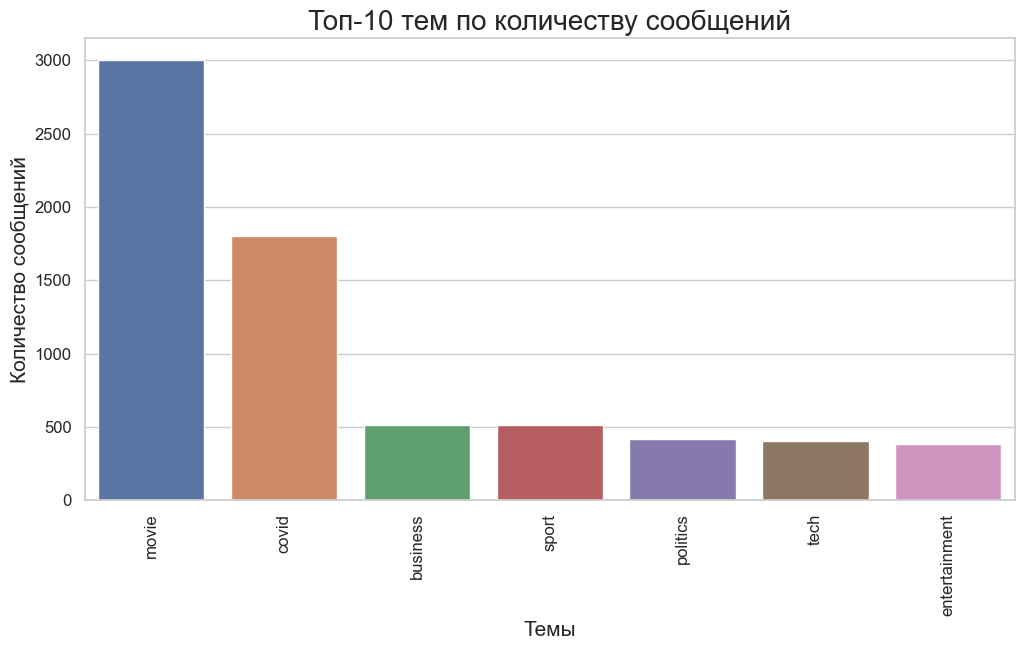

In [19]:
top_topics = post_text_df['topic'].value_counts().head(10)

# Установите стиль графика
sns.set(style="whitegrid")

# Создайте столбчатую диаграмму
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_topics.index, y=top_topics.values)

# Настройка внешнего вида графика
ax.set_title("Топ-10 тем по количеству сообщений", fontsize=20)
ax.set_xlabel("Темы", fontsize=15)
ax.set_ylabel("Количество сообщений", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Отобразите график
plt.show()


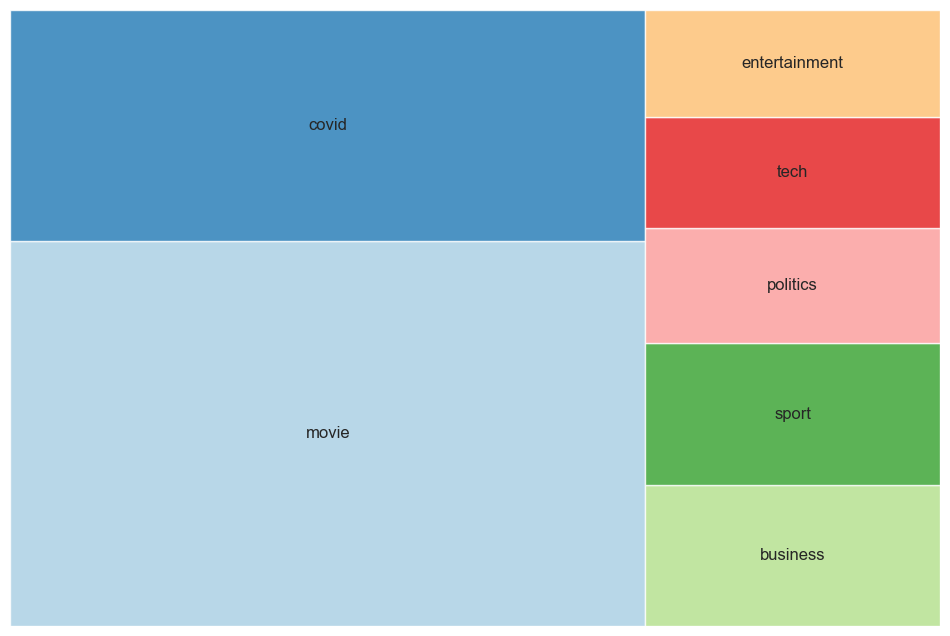

In [22]:
import squarify

# Count the number of posts for each topic
topic_counts = post_text_df['topic'].value_counts()

# Create a treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=topic_counts.values, label=topic_counts.index, alpha=0.8, color=sns.color_palette("Paired"))
plt.axis('off')
plt.show()


## feed_data

In [26]:
# Информация о наборе данных
print(feed_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10000 non-null  datetime64[ns]
 1   user_id    10000 non-null  int64         
 2   post_id    10000 non-null  int64         
 3   action     10000 non-null  object        
 4   target     10000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 390.8+ KB
None


In [35]:
feed_data.head()

,timestamp,user_id,post_id,action,target
0,2021-12-20 18:43:57,38762,476,like,0
1,2021-12-20 18:43:59,38762,5096,view,1
2,2021-12-20 18:44:39,38762,5096,like,0
3,2021-12-20 18:44:41,38762,1684,view,0
4,2021-12-20 18:46:22,38762,5203,view,0


Распределение целевой переменной (target) для просмотров:

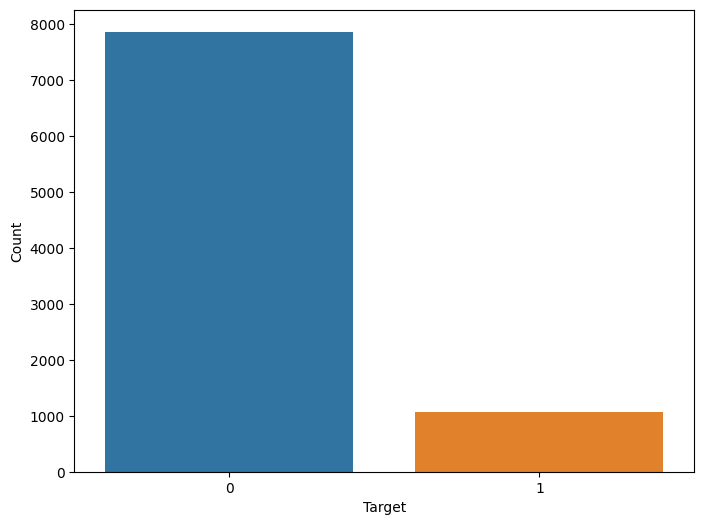

In [ ]:
views_data = feed_data[feed_data['action'] == 'view']
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=views_data)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


Соотношение лайков к просмотрам по времени:

<Figure size 1200x600 with 0 Axes>

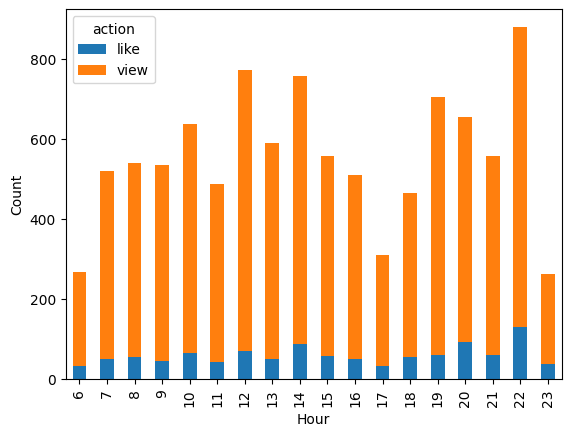

In [ ]:
feed_data['timestamp'] = pd.to_datetime(feed_data['timestamp'])
feed_data['hour'] = feed_data['timestamp'].dt.hour

hourly_actions = feed_data.groupby(['hour', 'action']).size().unstack()

plt.figure(figsize=(12, 6))
hourly_actions.plot(kind='bar', stacked=True)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
from sqlalchemy import create_engine


query = "SELECT * FROM user_data"

for chunk in pd.read_sql(query, engine, chunksize=10000):
    # Обработка данных и обучение модели на текущем блоке данных
    pass
